/Users/r.o./.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


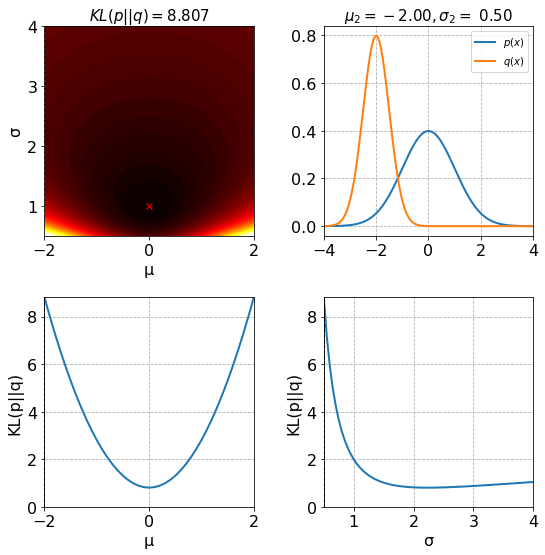

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 正規分布
def gaussian1d(x,μ,σ):
    y = 1 / ( np.sqrt(2*np.pi* σ**2 ) )  * np.exp( - ( x - μ )**2  / ( 2 * σ ** 2 ) )
    return y

# 正規分布のKL divergence
def gaussian1d_KLdivergence(μ1,σ1,μ2,σ2):
    A = np.log(σ2/σ1)
    B = ( σ1**2 + (μ1 - μ2)**2 ) / (2*σ2**2)
    C = -1/2
    y = A + B + C
    return y

# KL divergence
def KLdivergence(p,q,dx):
    KL=np.sum(p * np.log(p/q)) * dx
    return KL

def Motion(event):
    global cx,cy,cxid,cyid

    xp = event.xdata
    yp = event.ydata

    if (xp is not None) and (yp is not None):
        gca = event.inaxes

        if gca is axs[0]:
            cxid,cx = find_nearest(x,xp)
            cyid,cy = find_nearest(y,yp)

            lns[0].set_data(G_x,Qx[:,cxid,cyid])
            lns[1].set_data(x,Z[:,cyid])
            lns[2].set_data(y,Z[cxid,:])            


            lnhs[0].set_ydata([cy,cy])
            lnvs[0].set_xdata([cx,cx])

            lnvs[1].set_xdata([cx,cx])
            lnvs[2].set_xdata([cy,cy])


        if gca is axs[2]:    
            cxid,cx = find_nearest(x,xp)

            lns[0].set_data(G_x,Qx[:,cxid,cyid])
            lns[2].set_data(y,Z[cxid,:])            
            lnvs[0].set_xdata([cx,cx])
            lnvs[1].set_xdata([cx,cx])

        if gca is axs[3]:    
            cyid,cy = find_nearest(y,xp)

            lns[0].set_data(G_x,Qx[:,cxid,cyid])
            lns[1].set_data(x,Z[:,cyid])
            lnhs[0].set_ydata([cy,cy])
            lnvs[2].set_xdata([cy,cy])

    axs[1].set_title("$\mu_2=%5.2f, \sigma_2=$%5.2f" % (cx,cy),fontsize=15)
    axs[0].set_title('$KL(p||q)=$%.3f' % Z[cxid,cyid],fontsize=15)

    plt.draw()

def find_nearest(array, values):
    id = np.abs(array-values).argmin()
    return id,array[id]

# xの刻み
G_dx  = 0.01
# xの範囲
G_xlm = [-4,4]
# x座標
G_x   = np.arange(G_xlm[0],G_xlm[1]+G_dx,G_dx)
# xの数
G_n   = len(G_x)

# p(x)の平均μ1
μ1   = 0
# p(x)の標準偏差σ1
σ1   = 1  
# p(x)
px   = gaussian1d(G_x,μ1,σ1)

# q(x)の平均μ2
μ_lim = [-2,2]
μ_dx  = 0.1
μ_x   = np.arange(μ_lim[0],μ_lim[1]+μ_dx,μ_dx)
μ_n   = len(μ_x)

# q(x)の標準偏差σ2
σ_lim = [0.5,4]
σ_dx  = 0.05
σ_x   = np.arange(σ_lim[0],σ_lim[1]+σ_dx,σ_dx)
σ_n   = len(σ_x)

# KLダイバージェンス
KL   = np.zeros([μ_n,σ_n])
# q(x)
Qx   = np.zeros([G_n,μ_n,σ_n])

for i,μ2 in enumerate(μ_x):
    for j,σ2 in enumerate(σ_x):
        KL[i,j]   = gaussian1d_KLdivergence(μ1,σ1,μ2,σ2)
        Qx[:,i,j] = gaussian1d(G_x,μ2,σ2)

x   = μ_x
y   = σ_x

X,Y = np.meshgrid(x,y)
Z   = KL

cxid  = 0
cyid  = 0

cx    = x[cxid]
cy    = y[cyid]

xlm   = [ x[0], x[-1] ]
ylm   = [ y[0], y[-1] ]

axs   = []
ims   = []
lns   = []
lnvs  = []
lnhs  = []

# figure
#----------------
plt.close('all')
plt.figure(figsize=(8,8))
# デフォルトの色
clr=plt.rcParams['axes.prop_cycle'].by_key()['color']

# フォントサイズ
plt.rcParams["font.size"] = 16
# 線幅
plt.rcParams['lines.linewidth'] = 2
# gridのlinestyleを点線に
plt.rcParams["grid.linestyle"] = '--'

# plot時の範囲のマージンをなくす
plt.rcParams['axes.xmargin'] = 0.

# ax1
#----------------
ax = plt.subplot(2,2,1)

Interval = np.arange(0,8,0.1)
plt.plot(μ1,σ1,'rx',label='$(μ_1,σ_1)=(0,1)$')
im = plt.contourf(X,Y,Z.T,Interval,cmap='hot')
lnv= plt.axvline(x=cx,color='w',linestyle='--',linewidth=1)
lnh= plt.axhline(y=cy,color='w',linestyle='--',linewidth=1)

ax.set_title('$KL(p||q)=$%.3f' % Z[cxid,cyid],fontsize=15)
plt.xlabel('μ')
plt.ylabel('σ')

axs.append(ax)
lnhs.append(lnh)
lnvs.append(lnv)
ims.append(im)

# ax2
#----------------
ax = plt.subplot(2,2,2)
plt.plot(G_x,px,label='$p(x)$')
ln, = plt.plot(G_x,Qx[:,cxid,cyid],color=clr[1],label='$q(x)$')
plt.legend(prop={'size': 10})
ax.set_title("$\mu_2=%5.2f, \sigma_2=$%5.2f" % (cx,cy),fontsize=15)

axs.append(ax)
lns.append(ln)
plt.grid()

# ax3
#----------------
ax = plt.subplot(2,2,3)
ln,=plt.plot(x,Z[:,cyid])
lnv= plt.axvline(x=cx,color='k',linestyle='--',linewidth=1)

plt.ylim([0,np.max(Z)])
plt.grid()
plt.xlabel('μ')
plt.ylabel('KL(p||q)')

lnvs.append(lnv)
axs.append(ax)
lns.append(ln)

# ax4
#----------------
ax = plt.subplot(2,2,4)
ln,=plt.plot(y,Z[cxid,:])

lnv= plt.axvline(x=cy,color='k',linestyle='--',linewidth=1)

plt.ylim([0,np.max(Z)])
plt.xlim([ylm[0],ylm[1]])
plt.grid()

plt.xlabel('σ')
plt.ylabel('KL(p||q)')

lnvs.append(lnv)
axs.append(ax)
lns.append(ln)

plt.tight_layout()

for ax in axs:
    plt.axes(ax)
    ax.set_aspect(1/ax.get_data_ratio())

plt.connect('motion_notify_event', Motion)

plt.show()